In [76]:
import rasterio
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
%matplotlib inline

In [77]:
filename = './sih-data/Moradabadoutput.tif'
with rasterio.open(filename) as src:
    band_red = src.read(2)
with rasterio.open(filename) as src:
    band_nir = src.read(1)

In [78]:
numpy.seterr(divide='ignore', invalid='ignore')

# NDVI 
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
#we have to convert into float to consider decimal values as range is -1 to 1

In [79]:
print(numpy.nanmin(ndvi)) 
print(numpy.nanmax(ndvi))

-0.19474835886214442
0.6363636363636364


In [80]:
meta = src.meta
print(meta)
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

kwargs = meta
kwargs.update(dtype=ndvi_dtype)

kwargs.update(count=1)

with rasterio.open('./sih-data/ndvi.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 2807, 'height': 2699, 'count': 3, 'crs': CRS.from_epsg(32644), 'transform': Affine(5.0, 0.0, 274022.5625,
       0.0, -5.0, 3199677.0)}
float64


In [81]:

class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

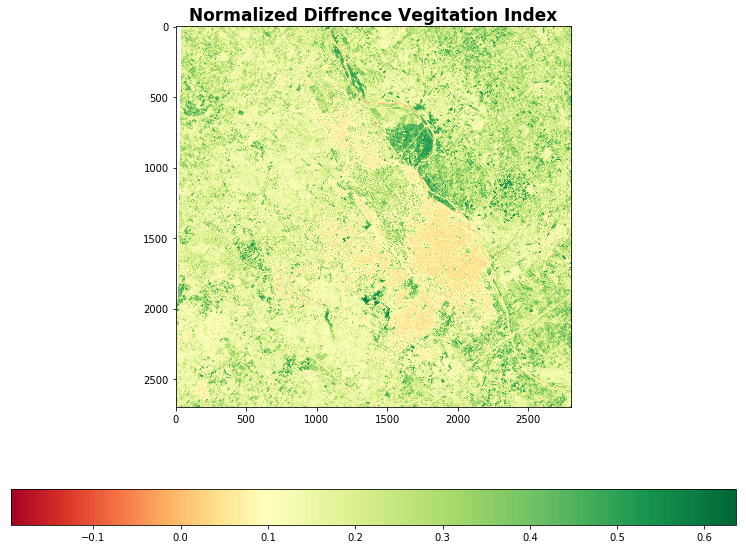

In [83]:
min=numpy.nanmin(ndvi)
max=numpy.nanmax(ndvi)

mid=0.1

colormap = plt.cm.RdYlGn 
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)

# ax.axis('off')

ax.set_title('Normalized Diffrence Vegitation Index', fontsize=17, fontweight='bold')

cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

fig.savefig("./sih-data/ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

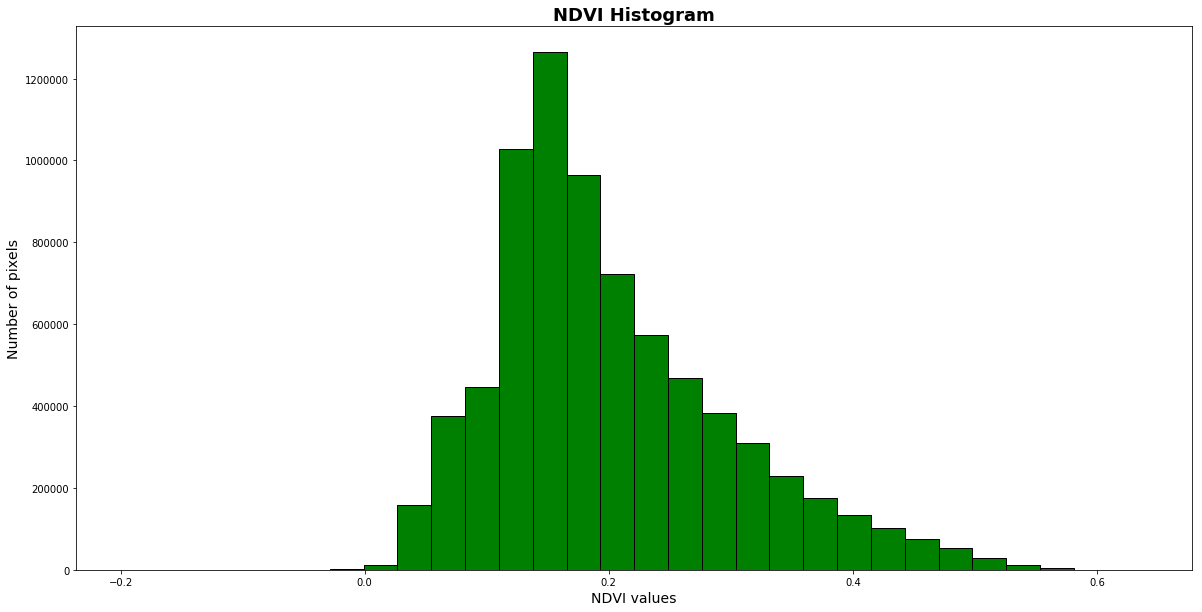

In [75]:

fig2 = plt.figure(figsize=(20,10))

ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

x = ndvi[~numpy.isnan(ndvi)]
color = 'g'

ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()

